# Homework 7: Pandas and Seaborn(27 pts)

**STATS 507, Fall 2025**

-------

**Name: YI WANG** 

**Email: wangyii@umich.edu** 

**Time spent on this homework: 3 hours** 

**I did not discuss this homework with anyone.**

# Question 1 (18 pts) 
We will look into the NYC flights dataset using Pandas!

## Question 1.1 (2 pts)
Load the dataset from flights.csv file given with this file into a dataframe variable named `df`

In [1]:
import pandas as pd

df = pd.read_csv('flights.csv.gz')


In [2]:
assert df is not None
assert isinstance(df, pd.core.frame.DataFrame)

## Question 1.2 (2 pts)
Get the total count of flights for each month and display the top three months with the highest count.

In [3]:

monthly_count = df.groupby('month').size().sort_values(ascending=False).head(3)


In [4]:
assert all(monthly_count == pd.Series([29425, 29327, 28889], index = [7, 8, 10]))

## Question 1.3 (2 pts)
First get a new dataframe with the three columns of interest 'carrier', 'month' and 'dep_delay'. Then compute the average dep_delay for each carrier and for each month. Rank the departure delays/month and filter the 1st rank carrier for each month (carrier with the lowest dep_delay for the month will get the 1st rank). Show the results in ascending order of the month

Hint: Some of the functions that can help are rank(), unstack(), stack(). 

In [5]:
import numpy as np
sub = df[['carrier', 'month', 'dep_delay']].copy()
avg = sub.groupby(['month', 'carrier'], as_index=False)['dep_delay'].mean()
avg['rank'] = avg.groupby('month')['dep_delay'].rank(method='min')
avg_delay = avg.loc[avg['rank'] == 1, ['month', 'carrier', 'dep_delay']].sort_values('month').reset_index(drop=True)


In [6]:
# Hidden test here

## Question 1.4 (2 pts)
Find the 5 top destinations in this dataset (most number of flights to). Filter only those flights to these top 5 destinations and then show the distribution of carriers on this filtered data.

In [7]:
import numpy as np

top_dest = df['dest'].value_counts().sort_values(ascending=False).head(5).index.values

filtered = df[df['dest'].isin(top_dest)]
top_carrier_count = filtered['carrier'].value_counts()


In [8]:
import numpy as np
assert np.all(top_dest == np.array(['ORD', 'ATL', 'LAX', 'BOS', 'MCO']))

## Question 1.5 (2 pts)
Get the total count of cancelled flights in this dataset. We'll say that a cancelled flight has dep_time missing.

In [9]:
cancelled_flight_count = int(df['dep_time'].isna().sum())


In [10]:
assert cancelled_flight_count == 8255

## Question 1.6 (2 pts)
Count all the destinations that have a letter 'K' anywhere in the name code.

In [11]:
dest_with_k = int(df['dest'].str.contains('K', na=False).sum())


In [12]:
assert dest_with_k == 4589

## Question 1.7 (2 pts)
Create a new column called speed that computes the speed as distance/air_time

In [13]:
df['speed'] = df['distance'] / df['air_time']


In [14]:
assert type(df['speed']) == pd.Series 
assert abs(df['speed'][0] - 6.1674) < 1

## Question 1.8 (4 pts)
Segment the dep_time 24 hours into 
* night from 12 midnight to 5 am
* morning from 5:01 am to 12 noon
* afternoon from 12.01 noon to 5 pm
* evening from 5.01 pm to 12 am

And then run a query to find the total flights in each segment and save that value in the given variable.


In [15]:
import numpy as np

def hhmm_to_minutes(x):
    if pd.isna(x):
        return np.nan
    try:
        x = int(x)
    except Exception:
        return np.nan
    hh = x // 100
    mm = x % 100
    return hh * 60 + mm

dep_minutes = df['dep_time'].apply(hhmm_to_minutes)
# night: 00:00-05:00, morning: 05:01-12:00, afternoon: 12:01-17:00, evening: 17:01-24:00
bins = [-1, 300, 720, 1020, 1440]
labels = ['night', 'morning', 'afternoon', 'evening']
df['part_of_day'] = pd.cut(dep_minutes, bins=bins, labels=labels)
parts_of_day_count = df['part_of_day'].value_counts().to_dict()


In [16]:
assert parts_of_day_count['morning'] == 129939
assert parts_of_day_count['evening'] == 98362

# Question 2 (9 pts) 
In this problem, we will do some exploratory data analytics (EDA) by using some of the visualization libraries in Python.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
flights = pd.read_csv("flights.csv.gz")
airports = pd.read_csv("airports.csv")
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


## Question 2.1 (3 pts)

Line charts are ideal to show a trend line. Draw a line chart to show monthly frequency count of flights as a trend line for the year 2013. Be sure to choose the correct data to display on the x-axis and y-axis.

Text(0, 0.5, 'Monthly Frequency')

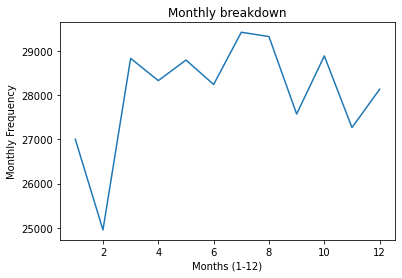

In [18]:
import matplotlib.pyplot as plt
monthly_counts = flights.groupby('month').size()
fig1 = plt.figure().gca()
fig1.plot(monthly_counts.index, monthly_counts.values)
fig1.set_title('Monthly breakdown')
fig1.set_xlabel('Months (1-12)')
fig1.set_ylabel('Monthly Frequency')


In [19]:
assert fig1.get_title() == 'Monthly breakdown'
assert fig1.get_xlabel() == 'Months (1-12)'
assert fig1.get_ylabel() == 'Monthly Frequency'
assert dict(fig1.lines[0].get_xydata())[6] == 28243

## Question 2.2 (3 pts)
Show the top 5 airports that people flew into using a bar chart. 

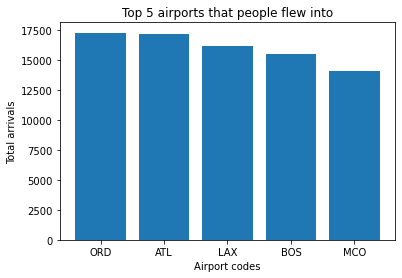

In [20]:
import matplotlib.pyplot as plt
top_dest_counts = flights['dest'].value_counts().sort_values(ascending=False).head(5)
fig_2 = plt.figure().gca()
fig_2.bar(top_dest_counts.index.tolist(), top_dest_counts.values.tolist())
fig_2.set_title('Top 5 airports that people flew into')
fig_2.set_xlabel('Airport codes')
fig_2.set_ylabel('Total arrivals')

fig2 = fig_2


In [21]:
x_axis = fig_2.get_xaxis()
text1 = x_axis.get_ticklabels()[0]
assert text1.get_text() == 'ORD'
assert fig_2.get_title() == 'Top 5 airports that people flew into'
assert fig_2.get_xlabel() == 'Airport codes'
assert fig_2.get_ylabel() == 'Total arrivals'

## Question 2.3 (3 pts)

Segment the flights based on time-slots with the following criteria
* flights that depart from 00-5:59am as 'red-eye' flights
* flights that depart from 6am - 11:59am as 'morning'
* flights that depart from 12noon - 3:59pm as 'afternoon'
* flights that depart from 4pm - 11:59pm as 'evening' 

And using seaborn create a plot as shown below. PS: Feel free to choose your color palette.

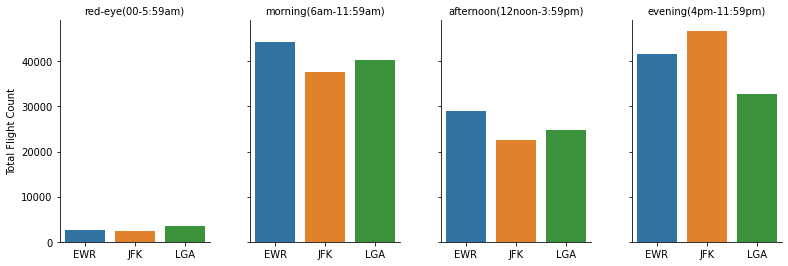

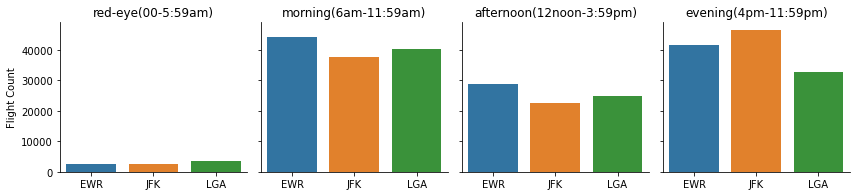

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

def hhmm_to_minutes(x):
    if pd.isna(x):
        return np.nan
    try:
        x = int(x)
    except Exception:
        return np.nan
    hh = x // 100
    mm = x % 100
    return hh * 60 + mm


mins = flights['dep_time'].apply(hhmm_to_minutes)


slot_labels = [
    'red-eye(00-5:59am)',
    'morning(6am-11:59am)',
    'afternoon(12noon-3:59pm)',
    'evening(4pm-11:59pm)',
]
slots = pd.cut(mins, bins=[-1, 359, 719, 959, 1439], labels=slot_labels)


by_slot_origin = (
    pd.DataFrame({'slot': slots, 'origin': flights['origin']})
      .dropna()
      .groupby(['slot', 'origin'])
      .size()
      .reset_index(name='count')
)


g = sns.catplot(
    data=by_slot_origin,
    x='origin', y='count',
    col='slot', col_order=slot_labels,
    kind='bar',
    order=['EWR', 'JFK', 'LGA'],
    height=3, aspect=1  
)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(slot_labels[i])
    ax.set_xlabel(None)
    if i == 0:
        ax.set_ylabel('Flight Count')  
    else:
        ax.set_ylabel(None)

fig_3 = g.axes.flat[0]

In [23]:
assert fig_3.figure.get_axes()[0].get_title() == 'red-eye(00-5:59am)'
assert fig_3.figure.get_axes()[0].get_ylabel() == 'Flight Count'
assert fig_3.figure.get_axes()[1].get_title() == 'morning(6am-11:59am)'